In [121]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import seaborn as sns

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, classification_report

from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import GaussianNB

#Classificadores Lineares
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression

#Classificadores KNN
from sklearn.neighbors import KNeighborsClassifier

#Classificadores Naive Nayes
from sklearn.naive_bayes import MultinomialNB

#Classificadores Arvores de Decisão
from sklearn.tree import DecisionTreeClassifier

#SVM
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, classification_report

from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import math

from sklearn import linear_model
from scipy.special import expit

from sklearn.metrics import confusion_matrix
import scipy
from scipy.io import arff

import numpy as np
from sklearn.datasets import fetch_olivetti_faces
from sklearn.svm import SVC
#from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.externals import joblib

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold, cross_val_score, LeaveOneOut
from sklearn.cluster import KMeans


In [122]:
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

### Criando um dataset de teste

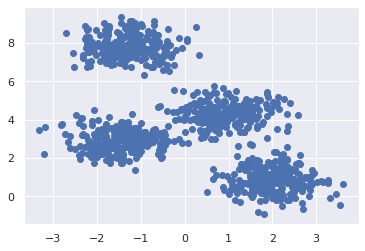

In [123]:
X, y = make_blobs(n_features=2, n_samples=1000, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:,0], X[:,1])

### Método para descobrir melhor valor para eps:

#### Uma abordagem para selecionar um número eps é a seguinte:
* utilizar NN (versão supervisionada) passando n igual ao número de features
    * O NearestNeighbors implementa a aprendizagem de vizinhos mais próximos não supervisionados.
* Plotamos os valores de distancia encontrados
* o valor de eps adequado aparece quando não há mais variação considerável do valor (similar a método elbow)

fonte: https://iopscience.iop.org/article/10.1088/1755-1315/31/1/012012/pdf

In [124]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

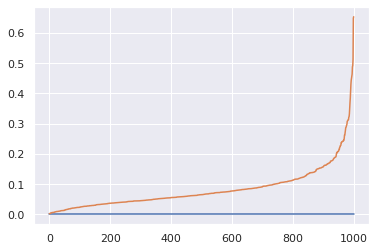

In [125]:
distances = np.sort(distances, axis=0)
dXistances = distances[:,1]
plt.plot(distances)

In [132]:
### Utilizando modelo DBScan

In [127]:
#m = DBSCAN()
m = DBSCAN(eps=0.3, min_samples=5)
m.fit(X)

DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [128]:
clusters = m.labels_
print(clusters)

[ 0  1  0  2  3  1  1 -1  1  1  0  3  2  0  3  2  2  0  1  3  1  0  3  3
  3  2  3  3  3  2  3  1  0  2  0 -1  0  1  2  2  1  1  1  2  0  1  1  0
  2  1  3  1  1  2  0  3  1  1  0  0  3  3  2  2  2  0  1  2  0  0  0  0
  0  2  1  0  1  0  2  3  1 -1  1  2  3 -1  1  1  2  2  0  2 -1  0  0  0
  2  2  1  1  3  2  1  3  1  2  1  0  2  3  1  1  2  0  2  2  1  2  3  3
  3  0  2  2  1  3  1  0  2  3  3  1  2  1  1  1  2  1  3  0  3  0  3  1
  0  0  3  1  0  0  3  1  1  1  2 -1  1  1  3  2  0  3  1  1  1  1  0  0
  1  3  2  3  3  3  2  3  2  3  3  1  2  1  2  1  1  2  3  2  3  0 -1  1
  3  3  2  0  2  0  2  2  2  1  0  0  3  3  2  1  0  1  0  2  1  0  2  1
  1 -1  3 -1  1  1  1  0 -1  1  1  2  0  0  1  2  1 -1  2  3  2  3 -1  2
  1  2  3  3  0  0  0  0  0 -1  1  2  0  2 -1  3  2 -1  0 -1  3  0  1  3
  0  2  1  2  0  3  3  1  3  2 -1  0  2  0  2  1  3  0  2  1  2  2  2  1
  2  0  3  2  1  0  0  3  0  3  1  0  3  0 -1  2  2  0  1  1  3  1  1  1
  0  3  2  1  2  3  1  0  1 -1  3  2  2 -1  0  3  0

In [9]:
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

### Mostrando clusters e pontos de borda

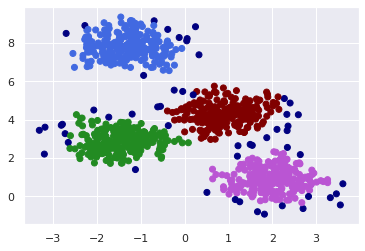

In [10]:
plt.scatter(X[:,0], X[:,1], c=vectorizer(clusters))

### Utilizando modelo dbscan com base de teste iris

In [17]:
df = pd.read_csv('iris.csv')

### Retirando coluna alvo

In [18]:
X = df.drop(['species'], axis=1)
y = df[['species']]

In [19]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN()

In [20]:
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [21]:
print(dbscan.labels_)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1
  1  1 -1  1  1  1  1  1  1 -1 -1  1 -1 -1  1  1  1  1  1  1  1 -1 -1  1
  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]


In [22]:
dbscan.labels_.shape
y['cluster']=dbscan.labels_
print(y)

species  cluster
0       setosa        0
1       setosa        0
2       setosa        0
3       setosa        0
4       setosa        0
..         ...      ...
145  virginica        1
146  virginica        1
147  virginica        1
148  virginica        1
149  virginica        1

[150 rows x 2 columns]


### Usando Kmeans para classificar texto

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

documents = ["This little kitty came to play when I was eating at a restaurant.",
             "Merley has the best squooshy kitten belly.",
             "Google Translate app is incredible.",
             "If you open 100 tab in google you get a smiley face.",
             "Best cat photo I've ever taken.",
             "Climbing ninja cat.",
             "Impressed with google map feedback.",
             "Key promoter extension for Google Chrome."]

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")
print("Prediction")

Y = vectorizer.transform(["chrome browser to open."])
prediction = model.predict(Y)
print(prediction)

Y = vectorizer.transform(["My cat is hungry."])
prediction = model.predict(Y)
print(prediction)

Top terms per cluster:
Cluster 0:
 cat
 best
 climbing
 ninja
 ve
 photo
 taken
 belly
 merley
 kitten
Cluster 1:
 google
 feedback
 map
 app
 impressed
 incredible
 translate
 key
 extension
 chrome


Prediction
[1]
[0]


### Kmeans para classificar imagens
#### Test Kmeans com base mnist
fonte: https://medium.com/@bsangramsing/k-means-clustering-for-imagery-analysis-881ced89053d

In [24]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('Training Data: {}'.format(x_train.shape))
print('Training Labels: {}'.format(y_train.shape))

Using TensorFlow backend.
Training Data: (60000, 28, 28)
Training Labels: (60000,)


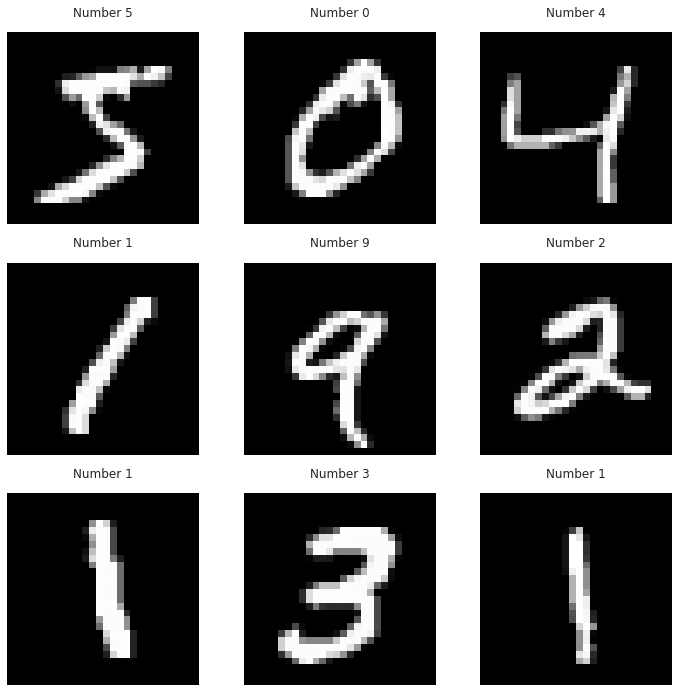

In [66]:
# create figure with 3x3 subplots using matplotlib.pyplot
fig, axs = plt.subplots(3, 3, figsize = (12, 12))
plt.gray()

# loop through subplots and add mnist images
for i, ax in enumerate(axs.flat):
    ax.matshow(x_train[i])
    ax.axis('off')
    ax.set_title('Number {}'.format(y_train[i]))
    
# display the figure
fig.show()

In [25]:
# preprocessing the images
# convert each image to 1 dimensional array
X = x_train.reshape(len(x_train),-1)
Y = y_train
# normalize the data to 0 - 1
X = X.astype(float) / 255.
print(X.shape)
print(X[0].shape)

(60000, 784)
(784,)


In [26]:
from sklearn.cluster import MiniBatchKMeans

n_digits = len(np.unique(y_test))
print(n_digits)

# Initialize KMeans model
kmeans = MiniBatchKMeans(n_clusters = n_digits)

# Fit the model to the training data
kmeans.fit(X)

10


MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=10, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [27]:
MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=10,
        n_init=3, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=10, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [28]:
kmeans.labels_

array([0, 2, 4, ..., 0, 8, 0], dtype=int32)

In [29]:
def infer_cluster_labels(kmeans, actual_labels):
    """
    Associates most probable label with each cluster in KMeans model
    returns: dictionary of clusters assigned to each label
    """

    inferred_labels = {}

    for i in range(kmeans.n_clusters):

        # find index of points in cluster
        labels = []
        index = np.where(kmeans.labels_ == i)

        # append actual labels for each point in cluster
        labels.append(actual_labels[index])

        # determine most common label
        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))

        # assign the cluster to a value in the inferred_labels dictionary
        if np.argmax(counts) in inferred_labels:
            # append the new number to the existing array at this slot
            inferred_labels[np.argmax(counts)].append(i)
        else:
            # create a new array in this slot
            inferred_labels[np.argmax(counts)] = [i]

        #print(labels)
        #print('Cluster: {}, label: {}'.format(i, np.argmax(counts)))
        
    return inferred_labels  

def infer_data_labels(X_labels, cluster_labels):
    """
    Determines label for each array, depending on the cluster it has been assigned to.
    returns: predicted labels for each array
    """
    
    # empty array of len(X)
    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)
    
    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key
                
    return predicted_labels
# test the infer_cluster_labels() and infer_data_labels() functions
cluster_labels = infer_cluster_labels(kmeans, Y)
X_clusters = kmeans.predict(X)
predicted_labels = infer_data_labels(X_clusters, cluster_labels)
print (predicted_labels[:20])
print (Y[:20])

[8 0 4 1 9 2 1 8 1 7 3 1 3 6 1 7 2 8 6 7]
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


In [31]:
from sklearn import metrics
def calculate_metrics(estimator, data, labels):
    # Calculate and print metrics
    print('Number of Clusters: {}'.format(estimator.n_clusters))
    print('Inertia: {}'.format(estimator.inertia_))
    print('Homogeneity: {}'.format(metrics.homogeneity_score(labels, estimator.labels_)))

In [32]:
clusters = [10, 16, 36, 64, 144, 256]

# test different numbers of clusters
for n_clusters in clusters:
    estimator = MiniBatchKMeans(n_clusters = n_clusters)
    estimator.fit(X)
    
    # print cluster metrics
    calculate_metrics(estimator, X, Y)
    
    # determine predicted labels
    cluster_labels = infer_cluster_labels(estimator, Y)
    predicted_Y = infer_data_labels(estimator.labels_, cluster_labels)
    
    # calculate and print accuracy
    print('Accuracy: {}\n'.format(metrics.accuracy_score(Y, predicted_Y)))

Number of Clusters: 10
Inertia: 2434624.181547001
Homogeneity: 0.3896242739243434
Accuracy: 0.49273333333333336

Number of Clusters: 16
Inertia: 2286486.121553915
Homogeneity: 0.5454169472865322
Accuracy: 0.6491833333333333

Number of Clusters: 36
Inertia: 1958539.3696893249
Homogeneity: 0.6832682335779149
Accuracy: 0.7466333333333334

Number of Clusters: 64
Inertia: 1810534.349148869
Homogeneity: 0.7410132079568705
Accuracy: 0.82015

Number of Clusters: 144
Inertia: 1631208.9539612785
Homogeneity: 0.8049904340237007
Accuracy: 0.8662

Number of Clusters: 256
Inertia: 1515199.7830530521
Homogeneity: 0.8394355516742201
Accuracy: 0.8962833333333333



In [33]:
# test kmeans algorithm on testing dataset
# convert each image to 1 dimensional array
X_test = x_test.reshape(len(x_test),-1)

# normalize the data to 0 - 1
X_test = X_test.astype(float) / 255.

# initialize and fit KMeans algorithm on training data
kmeans = MiniBatchKMeans(n_clusters = 256)
kmeans.fit(X)
cluster_labels = infer_cluster_labels(kmeans, Y)

# predict labels for testing data
test_clusters = kmeans.predict(X_test)
predicted_labels = infer_data_labels(kmeans.predict(X_test), cluster_labels)
    
# calculate and print accuracy
print('Accuracy: {}\n'.format(metrics.accuracy_score(y_test, predicted_labels)))

Accuracy: 0.8957



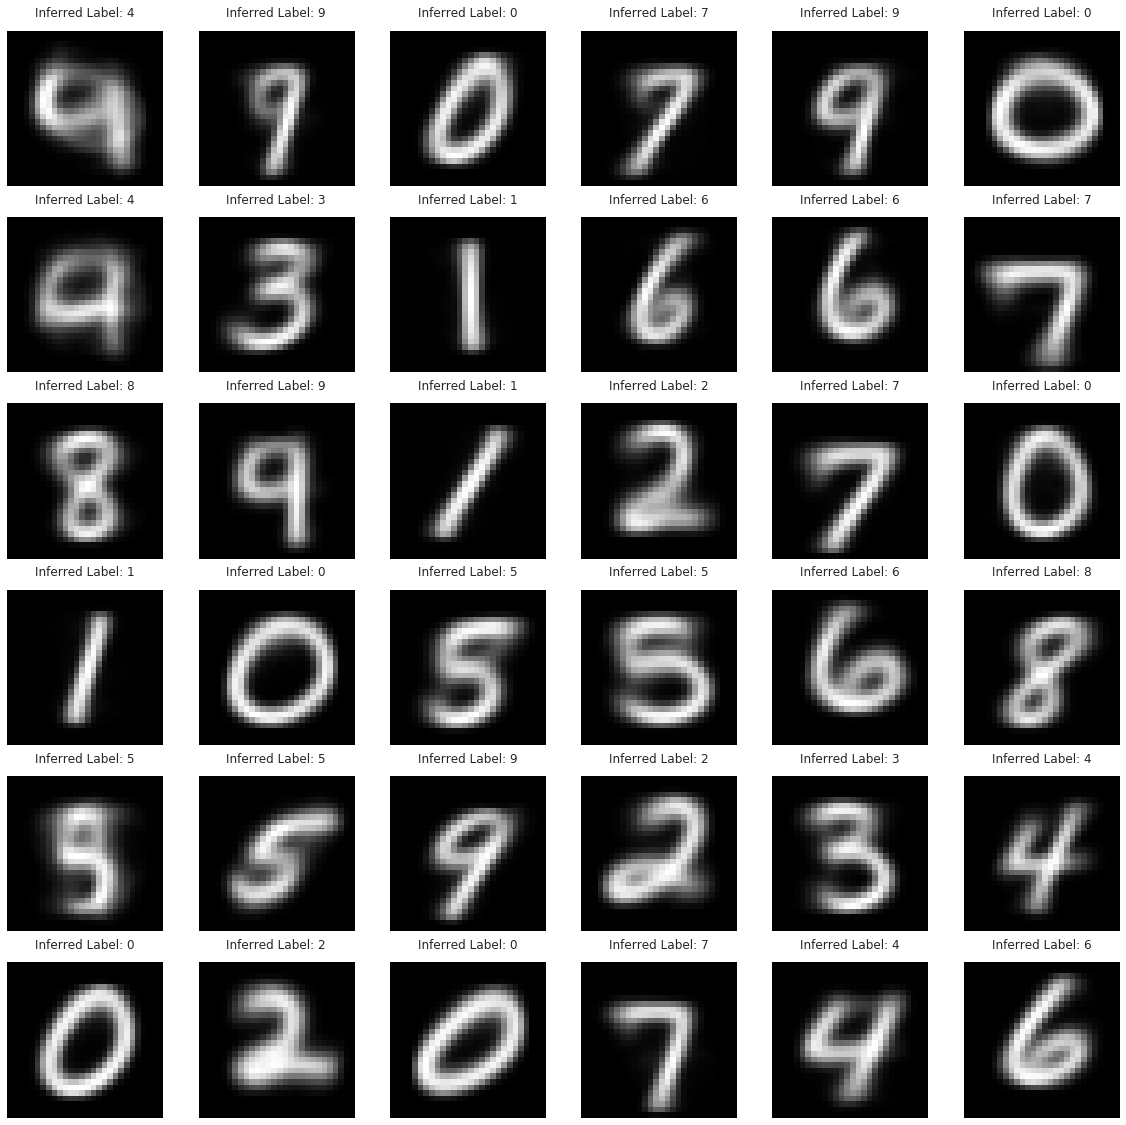

In [77]:
# Initialize and fit KMeans algorithm
kmeans = MiniBatchKMeans(n_clusters = 36)
kmeans.fit(X)

# record centroid values
centroids = kmeans.cluster_centers_

# reshape centroids into images
images = centroids.reshape(36, 28, 28)
images *= 255
images = images.astype(np.uint8)

# determine cluster labels
cluster_labels = infer_cluster_labels(kmeans, Y)

# create figure with subplots using matplotlib.pyplot
fig, axs = plt.subplots(6, 6, figsize = (20, 20))
plt.gray()

# loop through subplots and add centroid images
for i, ax in enumerate(axs.flat):
    
    # determine inferred label using cluster_labels dictionary
    for key, value in cluster_labels.items():
        if i in value:
            ax.set_title('Inferred Label: {}'.format(key))
    
    # add image to subplot
    ax.matshow(images[i])
    ax.axis('off')
    
# display the figure
fig.show()

# Classificador Nao Supervisionado - Adults




In [293]:
dfAdults = pd.read_csv("adult.csv.txt")

In [294]:
dfAdults.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [295]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

dfAdults["income-transformed"] = le.fit_transform(dfAdults["income"])
dfAdults["race-transformed"] = le.fit_transform(dfAdults["race"])
dfAdults["gender-transformed"] = le.fit_transform(dfAdults["gender"])
dfAdults["relationship-transformed"] = le.fit_transform(dfAdults["relationship"])
dfAdults["occupation-transformed"] = le.fit_transform(dfAdults["occupation"])
dfAdults["workclass-transformed"] = le.fit_transform(dfAdults["workclass"])
dfAdults["education-transformed"] = le.fit_transform(dfAdults["education"])
dfAdults["ms-transformed"] = le.fit_transform(dfAdults["marital-status"])

In [296]:
dfAdults.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,...,native-country,income,income-transformed,race-transformed,gender-transformed,relationship-transformed,occupation-transformed,workclass-transformed,education-transformed,ms-transformed
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,...,United-States,<=50K,0,2,1,3,7,4,1,4
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,...,United-States,<=50K,0,4,1,0,5,4,11,2
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,...,United-States,>50K,1,4,1,0,11,2,7,2
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,...,United-States,>50K,1,2,1,0,7,4,15,2
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,...,United-States,<=50K,0,4,0,3,0,0,15,4


In [297]:
from sklearn.preprocessing import MinMaxScaler

X = dfAdults[["ms-transformed", "education-transformed", "race-transformed", "gender-transformed", "relationship-transformed", "occupation-transformed", "age", "workclass-transformed", "income-transformed"]]

scalar = MinMaxScaler()
XScalar = scalar.fit_transform(X)

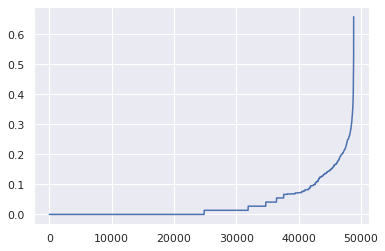

In [298]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(XScalar)
distances, indices = nbrs.kneighbors(XScalar)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [299]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
kmeans.fit(XScalar)
print(kmeans.labels_)
print(kmeans.cluster_centers_)

[1 1 1 ... 0 1 0]
[[ 4.81945817e-01  6.95812747e-01  8.90964674e-01 -2.68673972e-14
   5.52470356e-01  4.37619106e-01  2.72986152e-01  4.60096035e-01
   1.09251482e-01]
 [ 4.13899949e-01  6.80976008e-01  9.29931087e-01  1.00000000e+00
   1.57825421e-01  4.85812732e-01  3.08142399e-01  4.95562787e-01
   3.03767228e-01]]


In [300]:
y_pred = kmeans.predict(XScalar)

In [301]:
print(classification_report(dfAdults["income-transformed"], y_pred))

precision    recall  f1-score   support

           0       0.89      0.39      0.54     37155
           1       0.30      0.85      0.45     11687

    accuracy                           0.50     48842
   macro avg       0.60      0.62      0.49     48842
weighted avg       0.75      0.50      0.52     48842



## DBA

In [302]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN()
dbscan.fit(XScalar)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [303]:
X['income-y'] = dbscan.labels_
display(X)

,ms-transformed,education-transformed,race-transformed,gender-transformed,relationship-transformed,occupation-transformed,age,workclass-transformed,income-transformed,income-y
0,4,1,2,1,3,7,25,4,0,0
1,2,11,4,1,0,5,38,4,0,0
2,2,7,4,1,0,11,28,2,1,1
3,2,15,2,1,0,7,44,4,1,1
4,4,15,4,0,3,0,18,0,0,2
...,...,...,...,...,...,...,...,...,...,...
48837,2,7,4,0,5,13,27,4,0,2
48838,2,11,4,1,0,7,40,4,1,1
48839,6,11,4,0,4,1,58,4,0,2
48840,4,11,4,1,3,1,22,4,0,0


In [304]:
X['income-y'].unique()

array([ 0,  1,  2,  3, -1])

## MiniBatch

In [305]:
from sklearn.cluster import MiniBatchKMeans

n_digits = len(np.unique(dfAdults["income-transformed"]))
print(n_digits)

kmeans = MiniBatchKMeans(n_clusters = n_digits)

kmeans.fit(XScalar)

print(kmeans.labels_)
print(kmeans.cluster_centers_)

y_pred = kmeans.predict(XScalar)

2
[0 0 0 ... 1 0 1]
[[0.41208071 0.68569182 0.9321934  1.         0.1572327  0.47972821
  0.30412682 0.50147406 0.31761006]
 [0.46178344 0.70944798 0.89171975 0.         0.54140127 0.4310737
  0.27785534 0.45979299 0.11146497]]


In [306]:
print(classification_report(dfAdults["income-transformed"], y_pred))

precision    recall  f1-score   support

           0       0.70      0.61      0.65     37155
           1       0.11      0.15      0.13     11687

    accuracy                           0.50     48842
   macro avg       0.40      0.38      0.39     48842
weighted avg       0.56      0.50      0.53     48842

